In [5]:
import pandas as pd
import json

In [6]:
df = pd.read_csv("./data/titanic.csv")

In [7]:
def get_chart_value_counts(df, orient="index"):

    # tmp = df.value_counts().to_json(orient=orient)
    # value_counts = json.loads(tmp)

    value_counts = {}

    for col in df.columns:
        tmp = df[col].value_counts()
        tmp.sort_index(inplace=True)

        tmp = tmp.to_json(orient=orient)
        value_counts[col] = json.loads(tmp)

    return value_counts

In [8]:
get_chart_value_counts(df[["Embarked"]])

{'Embarked': {'C': 168, 'Q': 77, 'S': 644}}

In [25]:
df_age = df[["Age"]]

In [26]:
df_age["value"] = 1

<ipython-input-26-8925bd1960fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["value"] = 1


In [27]:
df_age

,Age,value
0,22.0,1
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,1
...,...,...
886,27.0,1
887,19.0,1
888,NaN,1
889,26.0,1


<AxesSubplot:>

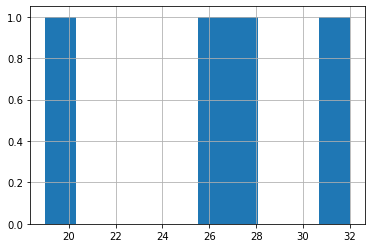

In [28]:
df_age[-5:]["Age"].hist()

In [29]:
df_age = df_age.dropna()